In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
#Usamos también las poderosas herramientas de procesamiento de imágenes en python de Scikit
from skimage.util import random_noise
from scipy import signal
import scipy.stats as st

In [3]:
def get_gauss_kernel(size=3,sigma=1):
    center=(int)(size/2)
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

In [4]:
def get_gauss_kernel_hp(size=3,sigma=1):
    center=(int)(size/2)
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))

    kernel = np.sum(kernel)/kernel
    return kernel / np.sum(kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


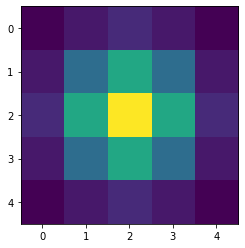

[[0.15004571 0.03347972 0.02030648 0.03347972 0.15004571]
 [0.03347972 0.00747034 0.00453099 0.00747034 0.03347972]
 [0.02030648 0.00453099 0.00274818 0.00453099 0.02030648]
 [0.03347972 0.00747034 0.00453099 0.00747034 0.03347972]
 [0.15004571 0.03347972 0.02030648 0.03347972 0.15004571]]


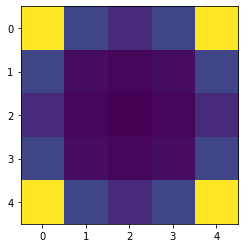

In [5]:
lp = get_gauss_kernel(5,1)

print(lp)
plt.imshow(lp)
plt.show()

hp = get_gauss_kernel_hp(5,1)

print(hp)
plt.imshow(hp)
plt.show()

In [6]:
def create_gauss_filter(h, w, k_size=15, sigma=5):
    filter = get_gauss_kernel(k_size, sigma)
    output = np.zeros((h,w))
    output[int(h/2):int(h/2) + k_size, int(w/2):int(w/2) + k_size] = filter

    return output, np.fft.fft2(output)

kernel


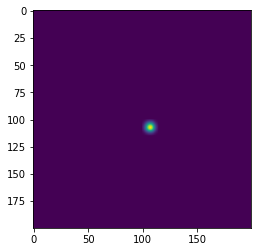

fft kernel


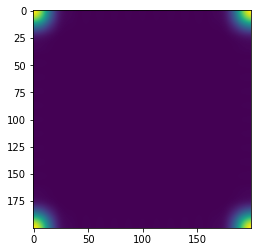

In [7]:
kernel, kernel_tf = create_gauss_filter(200, 200, k_size=15, sigma=3)
print("kernel")
plt.imshow(kernel)
plt.show()
print("fft kernel")
plt.imshow(abs(np.fft.fft2(kernel)))
plt.show()


In [8]:
def create_gauss_filter_hp(h, w, k_size=15, sigma=5):
    filter = get_gauss_kernel_hp(k_size, sigma)
    output = np.zeros((h,w))
    output[int(h/2):int(h/2) + k_size, int(w/2):int(w/2) + k_size] = filter

    return output, np.fft.fft2(output)

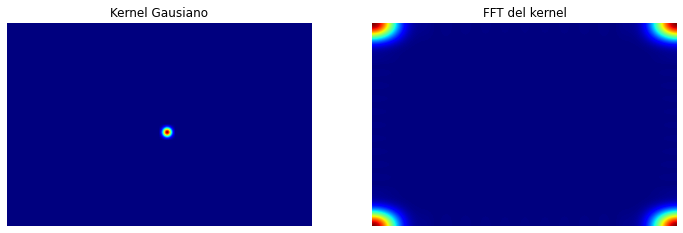

In [9]:
kernel, kernel_tf = create_gauss_filter(200, 300, k_size=15, sigma=3)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(np.abs(kernel_tf), cmap='jet')
plt.show()

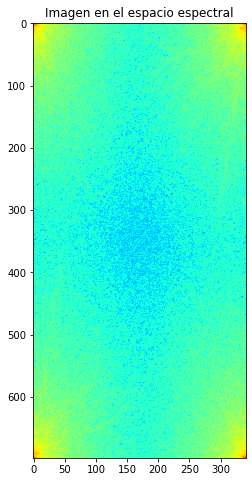

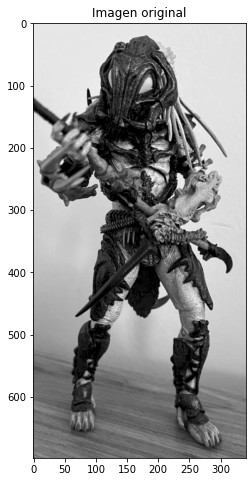

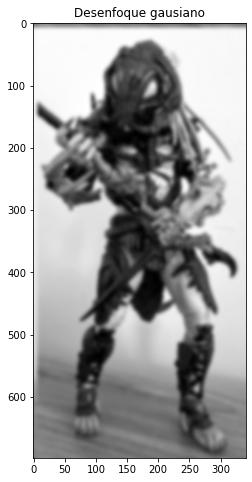

In [10]:
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
kernel, kernel_tf = create_gauss_filter(img.shape[0], img.shape[1], k_size=15, sigma=3)

img_fft = np.fft.fft2(img)

plt.figure(figsize=(8,8))
plt.imshow(20*np.log(np.abs(img_fft)), cmap='jet')
plt.title('Imagen en el espacio espectral')
plt.show()
filtered = img_fft * kernel_tf

#img_gauss = np.real(np.fft.ifft2(np.fft.ifftshift(filtered)))
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')
plt.show()

In [50]:
def freq(collection):
    d = {}
    max_freq_index = -1
    max_freq = -1

    for i in collection.flatten():
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
        
        if d[i] > max_freq:
            max_freq = d[i]
            max_freq_index = i
            
    return max_freq_index

In [56]:
def quality_measure(img):
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()

    F = np.fft.fft2(img)
    plt.imshow(20*np.log(np.abs(F)), cmap='gray')
    plt.title('img_fft')
    plt.show()

    FC = np.fft.ifftshift(F)

    plt.imshow(20*np.log(np.abs(FC)), cmap='gray')
    plt.title('img_shift')
    plt.show()

    AF = np.abs(FC)
    m = freq(AF)
    thres = m/1000
    th = len([x for x in F.flatten() if x > thres])
    img_shape = img.shape

    quality_measure = th / (img_shape[0] * img_shape[1])

    print("quality_measure")
    print(quality_measure)

    return quality_measure


Link to paper: https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/7ma-cohorte/Articulos/ImageSharpnessMeasureforBlurredImagesinFrequency.pdf

In [65]:
def quality_measure(img):
    F = np.fft.fft2(img)
    FC = np.fft.ifftshift(F)
    AF = np.abs(FC)
    m = freq(AF)
    thres = m/1000
    th = len([x for x in F.flatten() if x > thres])
    img_shape = img.shape

    quality_measure = th / (img_shape[0] * img_shape[1])

    print("quality_measure")
    print(quality_measure)

    return quality_measure


quality_measure
0.5018948146778816


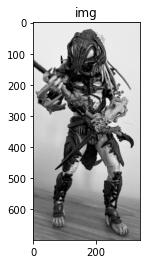

quality_measure
0.49641623742742147


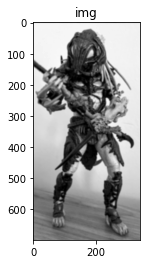

quality_measure
0.09267366333638632


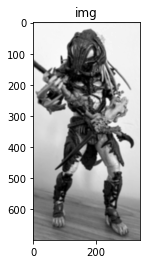

quality_measure
0.06096177600013444


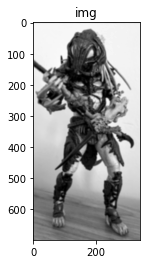

quality_measure
0.024136829987647993


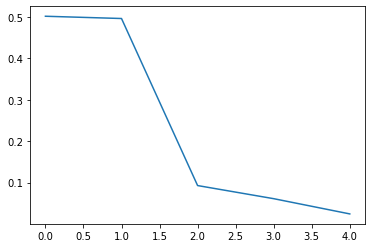

In [70]:
measures = []
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
measures.append(quality_measure(img))



for sigma_i in [0.5,2.5,5,7.5]:
    kernel, kernel_tf = create_gauss_filter(img.shape[0], img.shape[1], k_size=5, sigma=sigma_i)

    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    plt.imshow(img_gauss, cmap='gray')
    plt.title('img')
    plt.show()
    measures.append(quality_measure(img_gauss))


plt.plot(measures)


In [89]:
def valid_index(img, i, j):
    return not(i < 0 or j < 0 or i >= img.shape[0] or j >= img.shape[1])

Link to paper: https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/7ma-cohorte/Articulos/AnalysisOfFocusMeasureOperators.pdf Measure A.3. Image Contrast (MIS3)

In [93]:
def image_contrast_measure(img):
    coeficients = np.zeros(img.shape)
    
    for x in range(coeficients.shape[0]):
        for y in range(coeficients.shape[1]):
            for i in [x-1, x, x+1]:
                for j in [y-1, y, y+1]:
                    I_i_j = img[i][j] if valid_index(img, i, j) else 0
                    coeficients[x][y] = np.abs(img[x][y] - I_i_j)

    measure = 0
    for x in range(coeficients.shape[0]):
        for y in range(coeficients.shape[1]):
            measure = measure + coeficients[x][y]

    return measure

In [94]:
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)

image_contrast_measure(img)

/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_71374/1699036861.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  coeficients[x][y] = np.abs(img[x][y] - I_i_j)


19877404.0

/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_71374/1699036861.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  coeficients[x][y] = np.abs(img[x][y] - I_i_j)


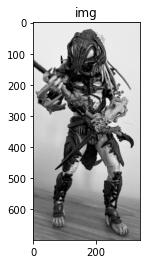

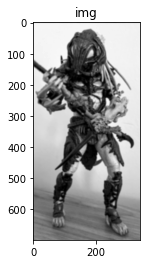

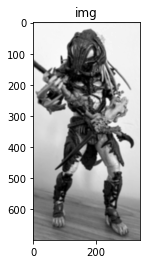

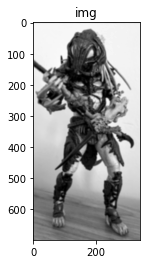

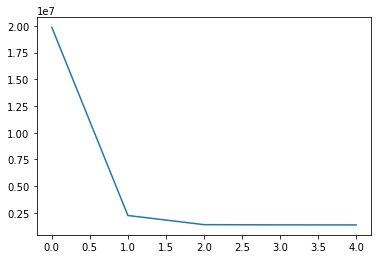

In [95]:
measures = []
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
measures.append(image_contrast_measure(img))



for sigma_i in [0.5,2.5,5,7.5]:
    kernel, kernel_tf = create_gauss_filter(img.shape[0], img.shape[1], k_size=5, sigma=sigma_i)

    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    plt.imshow(img_gauss, cmap='gray')
    plt.title('img')
    plt.show()
    measures.append(image_contrast_measure(img_gauss))


plt.plot(measures)